In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [93]:
class Model(nn.Module):
    def __init__(self, in_features=4, n1=8, n2=9, n3=12, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, n1)
        self.fc2 = nn.Linear(n1, n2)
        self.fc3 = nn.Linear(n2,n3)
        self.out = nn.Linear(n3, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x



In [94]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [16]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)

In [8]:
my_df.shape
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
my_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [17]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df.head()

C:\Users\91914\AppData\Local\Temp\ipykernel_16256\3881476234.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# my_df['output'] = le.fit_transform(my_df['variety'])

In [15]:
# my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,output
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [18]:
X = my_df.drop('variety', axis=1)
y= my_df['variety']

In [22]:
X = X.values
y = y.values

In [23]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [96]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [97]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [99]:
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr = lr)

In [29]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [38]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [102]:
model.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [34]:
epochs = 100
losses = []

for i in range(100):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"Epoch {i} : loss = {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 : loss = 0.05286872386932373
Epoch 10 : loss = 0.04508010298013687
Epoch 20 : loss = 0.039793118834495544
Epoch 30 : loss = 0.03596426174044609
Epoch 40 : loss = 0.03302799537777901
Epoch 50 : loss = 0.030512528494000435
Epoch 60 : loss = 0.027733484283089638
Epoch 70 : loss = 0.0246120635420084
Epoch 80 : loss = 0.021672355011105537
Epoch 90 : loss = 0.019320044666528702


In [103]:
epochs = 130
losses = []

for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # losses.append(loss.detach().cpu().numpy())
    losses.append(loss.item())

    if i % 10 == 0:
        print(f"Epoch {i} : loss = {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 : loss = 0.8245624899864197
Epoch 10 : loss = 0.7665526270866394
Epoch 20 : loss = 0.7088239789009094
Epoch 30 : loss = 0.6529036164283752
Epoch 40 : loss = 0.6017923355102539
Epoch 50 : loss = 0.5584403872489929
Epoch 60 : loss = 0.5237917304039001
Epoch 70 : loss = 0.495831161737442
Epoch 80 : loss = 0.4712519943714142
Epoch 90 : loss = 0.4477045238018036
Epoch 100 : loss = 0.42408978939056396
Epoch 110 : loss = 0.40049251914024353
Epoch 120 : loss = 0.37653499841690063


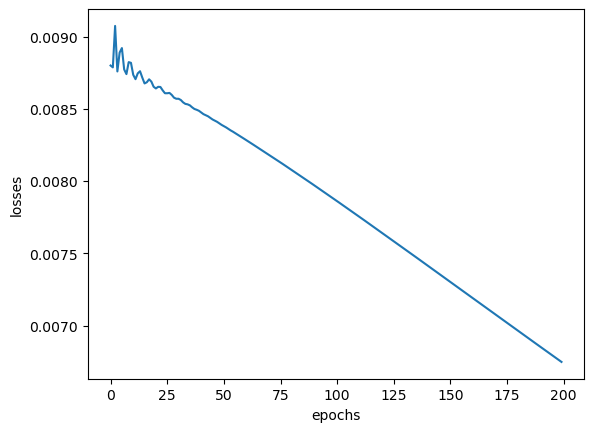

In [78]:
plt.plot(range(epochs), losses)
plt.ylabel('losses')
plt.xlabel('epochs')
plt.show()

In [101]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

print(loss)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [85]:
y_eval

tensor([[-16.6856,   0.5198,  10.7062],
        [-22.8898,  -6.1607,  22.8319],
        [-25.6905,  -5.5209,  24.1422],
        [ -9.8742,   9.7944,  -5.9447],
        [-21.1375,  -2.1835,  16.9906],
        [ -7.9707,  10.5988,  -9.2379],
        [-16.4537,   2.5106,   8.0307],
        [ -9.7433,   9.8959,  -6.2511],
        [-18.6684,   0.2821,  12.2807],
        [-24.3686,  -6.6188,  24.3640],
        [-15.2824,   3.5581,   5.9597],
        [ 20.3380,   1.8230, -36.4723],
        [ 18.5331,   1.6503, -33.0609],
        [ -5.2363,   9.5218, -10.1062],
        [ 16.4959,   2.9846, -32.2272],
        [-14.0475,   5.4275,   2.8086],
        [ 18.3274,   2.0056, -33.4279],
        [-15.9539,   1.7888,   8.6385],
        [ 21.9338,   1.2259, -37.9776],
        [ 15.3117,   2.5685, -29.4437],
        [ -6.2400,   9.9579,  -9.8578],
        [-23.3536,  -4.7407,  21.6542],
        [ 16.8641,   2.8252, -32.5541],
        [ 19.7623,   1.6336, -35.1137],
        [ -6.4671,  10.3821, -10.3649],


In [91]:
print(loss.item())

0.41645899415016174


In [92]:
correct = 0

for i, data in enumerate(X_test):
    print(f"{i+1}) {y_eval[i].argmax()} {y_test[i]}")

    if y_eval[i].argmax() == y_test[i]:
        correct += 1

    # y_eval[i]

print(correct)

1) 2 2
2) 2 2
3) 2 2
4) 1 1
5) 2 2
6) 1 1
7) 2 2
8) 1 1
9) 2 2
10) 2 2
11) 2 2
12) 0 0
13) 0 0
14) 1 1
15) 0 0
16) 1 2
17) 0 0
18) 2 1
19) 0 0
20) 0 0
21) 1 1
22) 2 2
23) 0 0
24) 0 0
25) 1 1
26) 1 1
27) 1 1
28) 1 1
29) 0 0
30) 1 1
28


In [117]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [120]:
new = torch.tensor([7.0,5.0,7.0,5.0]).to(device)
# new.to(device)

In [108]:
X_train[0]

tensor([5.7000, 2.6000, 3.5000, 1.0000], device='cuda:0')

In [111]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)>

In [121]:
with torch.no_grad():
    pred = model.forward(new)
    print(pred.argmax().item())

2


### saving the model


In [122]:
torch.save(model.state_dict(), 'iris_nn.pt')

In [123]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_nn.pt'))


C:\Users\91914\AppData\Local\Temp\ipykernel_16256\3234552598.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_nn.pt'))


<All keys matched successfully>

In [126]:
torch.save(model, 'iris_nn_full.pth')

In [125]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)

In [128]:
scripted_model = torch.jit.script(model)
scripted_model.save('iris_nn_3.pt')